In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X_train[1])
  plt.xlabel(classes[y[index]])

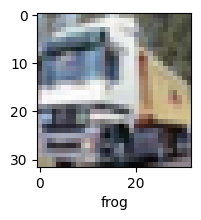

In [14]:
plot_sample(X_train,y_train,0)

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [28]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 104ms/step - accuracy: 0.3014 - loss: 1.9353
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 224s 118ms/step - accuracy: 0.4213 - loss: 1.6466
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 119ms/step - accuracy: 0.4491 - loss: 1.5556
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 160s 92ms/step - accuracy: 0.4786 - loss: 1.4853
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 193s 86ms/step - accuracy: 0.4934 - loss: 1.4373


In [29]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.4767 - loss: 1.4709


[1.4774291515350342, 0.47380000352859497]

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

NameError: name 'ann' is not defined

In [5]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [17]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4061 - loss: 1.6423
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6164 - loss: 1.0959
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6684 - loss: 0.9548
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7023 - loss: 0.8532
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7300 - loss: 0.7768
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7523 - loss: 0.7033
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7746 - loss: 0.6493
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7934 - loss: 0.5886
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8112 - loss: 0.5393
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8296 - loss: 0.4925


In [18]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6971 - loss: 0.9455


[0.9509723782539368, 0.6977999806404114]

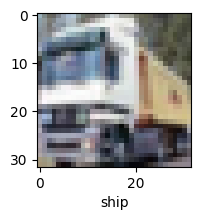

In [19]:
y_test = y_test.reshape(-1,)
plot_sample(X_test,y_test,1)

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.27091213e-05, 1.43170590e-04, 2.48657167e-03, 9.46804583e-01,
        8.08397250e-04, 4.37789299e-02, 5.65290032e-03, 5.44826253e-05,
        1.16118143e-04, 9.21274841e-05],
       [2.72218342e-04, 3.01234927e-02, 5.41880034e-08, 9.12516995e-08,
        2.89504722e-08, 2.60084088e-09, 4.50635917e-11, 3.12019161e-10,
        9.69545782e-01, 5.83656511e-05],
       [4.33301687e-01, 6.39203861e-02, 5.95526479e-04, 6.62307255e-03,
        3.45993671e-03, 1.80363888e-04, 9.91629669e-04, 3.13199237e-02,
        3.54517430e-01, 1.05090097e-01],
       [9.17007565e-01, 3.69553678e-02, 3.28495586e-03, 1.16956257e-03,
        2.51710229e-02, 1.93454889e-05, 2.65268372e-05, 7.73490046e-06,
        1.62089672e-02, 1.48827108e-04],
       [5.85657006e-07, 1.21982295e-04, 1.80971306e-02, 4.35385764e-01,
        1.92303330e-01, 7.51343416e-03, 3.46484184e-01, 3.97316035e-05,
        3.04572791e-06, 5.07537079e-05]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 3]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

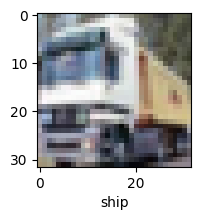

In [23]:
plot_sample(X_test,y_test,1)

In [24]:
classes[y_classes[1]]

'ship'